# Tarea 6

**Envío del PR inicial:** Sábado, 3 de noviembre

**Aceptación del PR:** Viernes 9 de noviembre

**NOTA:** Esta tarea debe entregarse en equipo.

In [1]:
include("DualNum.jl")
using TaylorSeries
using Plots

# 1

- ¿Cómo se generaliza la expresión anterior para el exponente de Lyapunov en mapeos de 1 variable, a mapeos de 2 variables?


- ¿Cómo se compara el exponente de Lyapunov $\lambda(x_0)$ con $\lambda( f(x_0) )$, para el mapeo $x\mapsto f(x)$?

# 2

Obtengan, para la familia de mapeos cuadrática $Q_c(x)$, el diagrama que muestra el exponente de Lyapunov en términos de $c$, para $c\in[-2,2]$.

- ¿Qué particularidad ocurre (en términos del exponente de Lyapunov) para los valores de $c$ donde hay bifurcaciones?

- ¿Qué particularidad ocurre (en términos del exponente de Lyapunov) cuando tenemos *ciclos superestables*, es decir, cuando $x=0$ es parte de un ciclo periódico?

In [28]:
"""
    iterados(f,nout,crange)
Devuelve una matriz cuyas filas corresponden al n-ésimo iterado de la función `f`.
Las columnas corresponden a un mismo parámetro `c` de la función `f`.
"""
function iterados(f,x0,nout,crange)
    
    ff = Array{Float64,2}(undef, nout, length(crange))
    
    
    
    for ic in eachindex(crange)
        x = x0
        cc = crange[ic]
        #@inbounds ff[1,ic] = x0
        for it = 1:nout
            x = f(x, cc)
            @inbounds ff[it, ic] = x
        end

    end
    
    return ff

end

iterados

In [19]:
function lambda(f, x0,nout,crange)
    
    ff = iterados(f,x0,nout,crange)
    
    L = Array{Float64,1}(undef, length(crange))
    
    for ic in eachindex(crange)
        sum = 0.0
        for it in 1:nout
            sum = sum + log(abs(f(DualNum.dual(ff[it,ic]),crange[ic]).x´))
        end
        lambda = sum/nout
        @inbounds L[ic] = lambda
    end
    
    return L
end

lambda (generic function with 2 methods)

In [33]:
Qc(x,c) = x^2+c
E_L = lambda(Qc,0.1,1000000,-2.0:0.02:2.0)

201-element Array{Float64,1}:
   0.6931487911048059  
   0.6343233826425637  
   0.602359870746605   
   0.5608212683946012  
   0.5705301365628103  
   0.5495089531402226  
   0.5290131768302012  
   0.48666217766781916 
   0.49532280737572715 
   0.46559521029501494 
   0.4036906614143553  
   0.030921152382775402
  -0.26765247157618666 
   ⋮                   
 Inf                   
 Inf                   
 Inf                   
 Inf                   
 Inf                   
 Inf                   
 Inf                   
 Inf                   
 Inf                   
 Inf                   
 Inf                   
 Inf                   

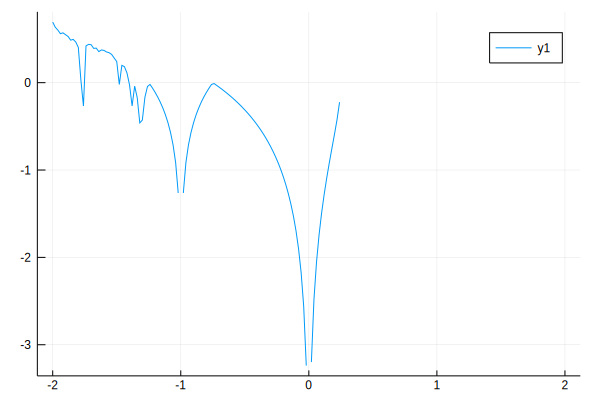

In [35]:
plot(-2.0:0.02:2.0, E_L)

# 3

Rehacer los cálculos de los exponentes de Feigenbaum,
\begin{eqnarray*}
f_n &=& \frac{C_n-C_{n+1}}{C_{n+1}-C_{n+2}},\\
a_n &=& \frac{d_n}{d_{n+1}},
\end{eqnarray*}

usando los valores $C_n$ donde se tienen ciclos superestables de periodo $2^n$. (Este ejercicio es muy parecido a los ejercicios 1 y 3 de la `Tarea4`.) 

Nota: Es importante dar un punto suficientemente bien aproximado a $C_n$ para que el método de Newton converja bien.

# 4

Comparar gráficamente los mapeos $Q_{c}(x)$ y $Q_{c^\prime}^2(x)$ para $c=1/4, 0, -3/4, -1, -2, -2.2$ y $c^\prime=-3/4,-1,-5/4,-1.3, -1.546\dots, -1.65$. 


In [37]:
"""
    Qcⁿ(x, args)

Esta función define el n-enésimo iterado de Qc(x,c),
donde el valor a iterar es `x` y el valor del parámetro
es `c`, donde `c = args[1]` y `n = args[2]`.
"""
function Qcⁿ(x, args)
    c, n = args[1], args[2]
    @assert n >= 0 && isa(n,Int)
    n <= 1 && return Qc(x,c)
    for it = 1:n
        x = Qc(x,c)
    end
    return x
end

Qcⁿ

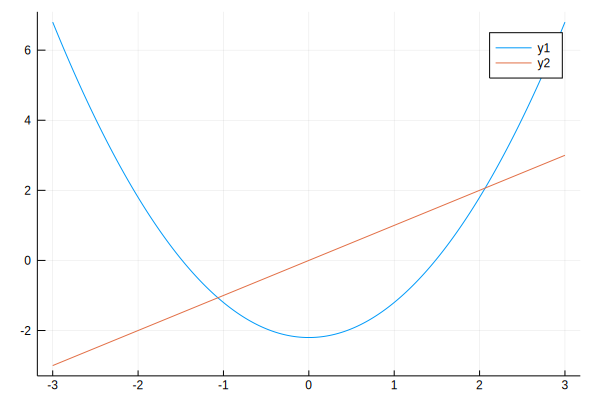

In [38]:
xrange = -3:1/128:3
p1 = plot(xrange, x->Qc(x,1/4))
plot!(xrange,x->x)
p2 = plot(xrange, x->Qc(x,0.0))
plot!(xrange, x->x)
p3 = plot(xrange, x->Qc(x,-3/4))
plot!(xrange, x->x)
p4 = plot(xrange, x->Qc(x,-1.0))
plot!(xrange, x->x)
p5 = plot(xrange, x->Qc(x,-2.0))
plot!(xrange, x->x)
p6 = plot(xrange, x->Qc(x,-2.2))
plot!(xrange, x->x)

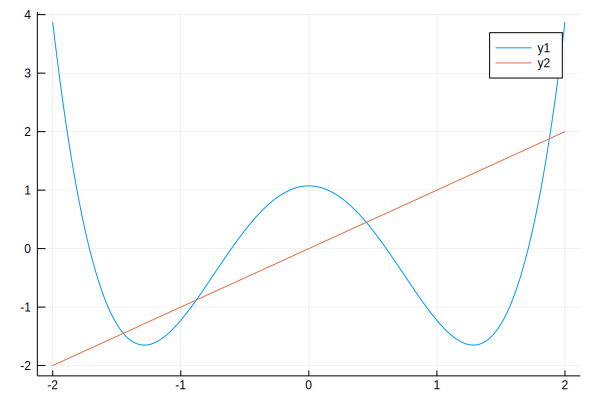

In [40]:
x = -2:1/128:2
P1 = plot(x, x->Qcⁿ(x,(-3/4,2)))
plot!(x, x->x)
P2 = plot(x, x->Qcⁿ(x,(-1.0,2)))
plot!(x, x->x)
P3 = plot(x, x->Qcⁿ(x,(-5/4,2)))
plot!(x, x->x)
P4 = plot(x, x->Qcⁿ(x,(-1.3107026413368328,2)))
plot!(x, x->x)
P5 = plot(x, x->Qcⁿ(x,(-1.546,2)))
plot!(x, x->x)
P6 = plot(x, x->Qcⁿ(x,(-1.65,2)))
plot!(x, x->x)

# 5

Estudiar la dinámica para $c=-2.2$

- ¿Cómo se caracteriza el valor al que tiende *casi* cualquier condición inicial en el
intervalo $I=[-p_+,p_+]$ (donde $p_+$ es el valor positivo tal que $Q_c(p_+)=p_+$), después de muchos iterados? (El intervalo $I$ es donde "toda la dinámica interesante ocurre".)

- Caractericen los subconjuntos de $I$ tales que, después de $n=1,2,3,\dots$ iterados de $Q_c(x)$, su intersección con $I$ es vacía.

- Caracterizen al complemento del conjunto de los casos anteriores, es decir, cuando los iterados de la condición inicial **no** llegan a donde *casi* cualquier condición inicial termina. ¿Cómo se conoce a este conjunto?

# 6

- Usando el análisis gráfico para un valor de $c$ *ligeramente* anterior al punto donde se observa la ventana de periodo 3 para la familia $Q_c(x)$, y uno en la ventana de periodo 3, concluyan el tipo de bifurcación que se observa.

- Comparen la dinámica para ambos valores de $c$ del inciso anterior. ¿Cómo es el exponente de Lyapunov en cada caso?

- Encuentren el valor de $c$ donde se da el ciclo superestable de periodo 3. (Nuevamente, usen el método de Newton con una buena semilla inicial para $c$.) Demuestren que para este valor de $c$ el mapeo $Q_c^3(x)$ tiene *ocho* puntos fijos, donde dos de ellos son puntos fijos de $Q_c(x)$, y los otros 6 forman dos secuencias periódicas, de periodo 3 en $Q_c(x)$, una de ellas estable y la otra inestable.

(Los siguientes incisos usan el valor de $c$ encontrado en el inciso anterior.)

- Denotando al ciclo inestable de periodo 3 como $\alpha\mapsto \beta\mapsto\gamma$, con $\gamma<\beta<\alpha$, uno puede asociar a cada uno de estos valores un valor $\hat\alpha, \hat\beta, \hat\gamma$, tales que $Q_c^3(\hat\alpha)=\alpha$, $Q_c^3(\hat\beta)=\beta$, $Q_c^3(\hat\gamma)=\gamma$. ¿Qué podemos concluir de un punto que cae en cualquiera de los intervalos $[\alpha,\hat\alpha]$, $[\beta,\hat\beta]$ y $[\hat\gamma,\gamma]$, en términos de los iterados sucesivos?

- Definiendo los intervalos $I_0=[\hat\beta, \alpha]$, $I_1=[\gamma,\beta]$, mostrar que bajo la acción de $Q_c(x)$ se cumple: (i) $Q_c(I_0) \supset I_1$, y (ii) $Q_c(I_1) \supset I_0\cup I_1$. ¿Qué propiedad *importante* de $Q_c(x)$ se utiliza aquí?

(Los intervalos $I_0$ e $I_1$, y estas propiedades, son básicos en la demostración del teorema "periodo tres implica caos".)